In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))




[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aadesh/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
data = pd.read_csv('dataset/amazon_alexa.tsv', delimiter='\t', quoting= 3)
print(f"Dataset Shape: {data.shape}")

Dataset Shape: (3150, 5)


In [8]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [9]:
data

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in betw...",1
3146,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, chec...",1
3147,5,30-Jul-18,Black Dot,"""I do love these things, i have them running m...",1
3148,5,30-Jul-18,White Dot,"""Only complaint I have is that the sound quali...",1


In [14]:
print(f"Feature names: {data.columns.values}")

Feature names: ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [15]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [17]:
data[data['verified_reviews'].isna() == True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [18]:
data.dropna(inplace=True)

In [19]:
print(f"Dataset Shape after droping null values: {data.shape}")

Dataset Shape after droping null values: (3149, 5)


In [22]:
data['length'] = data['verified_reviews'].apply(len)
data

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in betw...",1,52
3146,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, chec...",1,137
3147,5,30-Jul-18,Black Dot,"""I do love these things, i have them running m...",1,443
3148,5,30-Jul-18,White Dot,"""Only complaint I have is that the sound quali...",1,382


In [23]:
print(f"Data readings value count: {data['rating'].value_counts()}")

Data readings value count: rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


Text(0, 0.5, 'Count')

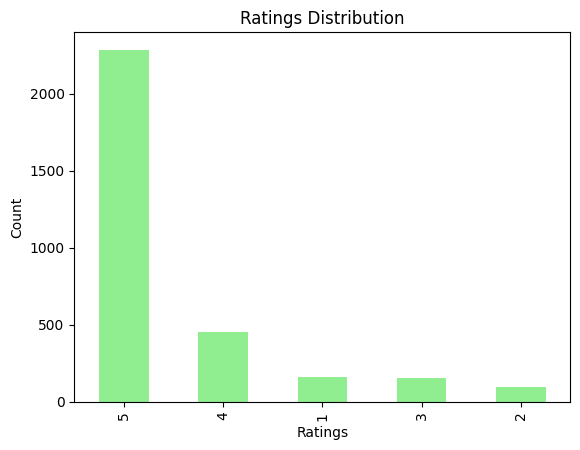

In [30]:
data['rating'].value_counts().plot.bar(color='lightgreen')
plt.title('Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('Count')

Text(0.5, 1.0, 'variation based count')

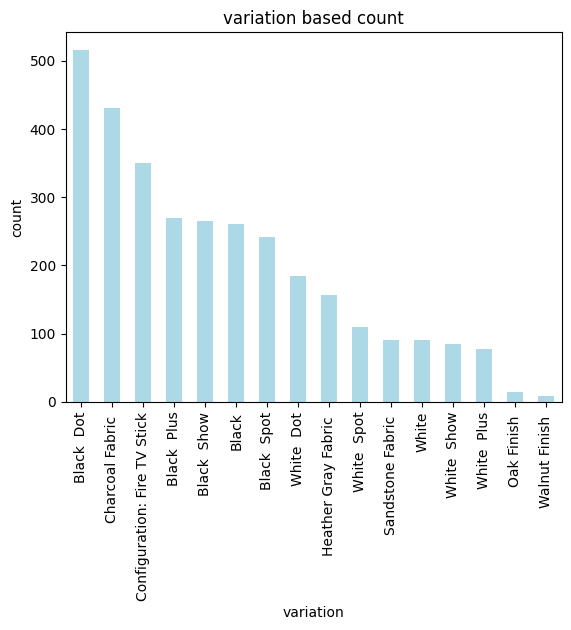

In [29]:
data['variation'].value_counts().plot.bar(color='lightblue')
plt.ylabel('count')
plt.title("variation based count")

In [31]:
print(f"Rating value count - Percentage: \n{round(data['rating'].value_counts()/data.shape[0]*100,2)}")

Rating value count - Percentage: 
rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


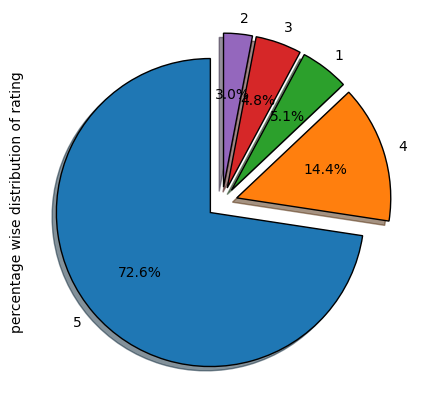

In [36]:
fig = plt.figure(figsize=(5,5))
colors = ('red', 'lightblue', 'orange', 'green', 'yellow')
wp = {'linewidth' : 1, "edgecolor":'black'}
tags = data['rating'].value_counts()/data.shape[0]
explode = (0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow = True, color = colors, startangle = 90, wedgeprops = wp, explode = explode, label = 'percentage wise distribution of rating')
from io import BytesIO
graph = BytesIO()
fig.savefig(graph, format='png')

Feedback Analysis Coloumn

In [37]:
print(f"Feedback value count: \n{data['feedback'].value_counts()}")

Feedback value count: 
feedback
1    2893
0     256
Name: count, dtype: int64


In [40]:
r1 = data[data['feedback'] == 1].iloc[1]['verified_reviews']
print(r1)
r0 = data[data['feedback'] == 0].iloc[1]['verified_reviews']
print(r0)

Loved it!
Sound is terrible if u want good music too get a bose


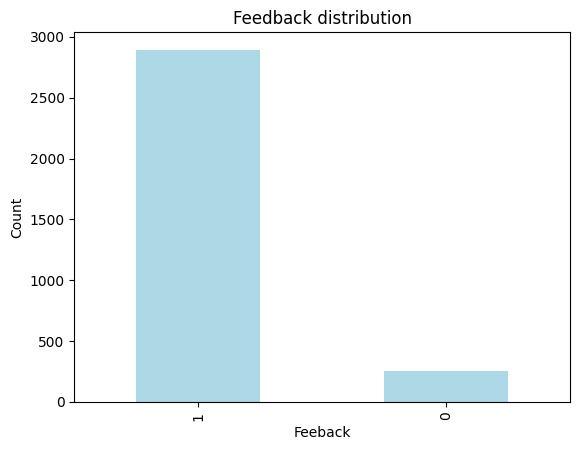

In [44]:
data['feedback'].value_counts().plot.bar(color='lightblue')
plt.title("Feedback distribution")
plt.xlabel("Feeback")
plt.ylabel("Count")
plt.show()

In [45]:
data[data['feedback'] == 0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [46]:
data[data['feedback'] == 1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

Variation Coloumn Analysis

In [47]:
print(f"Variation coloumn values: \n{data['variation'].value_counts()}")

Variation coloumn values: 
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


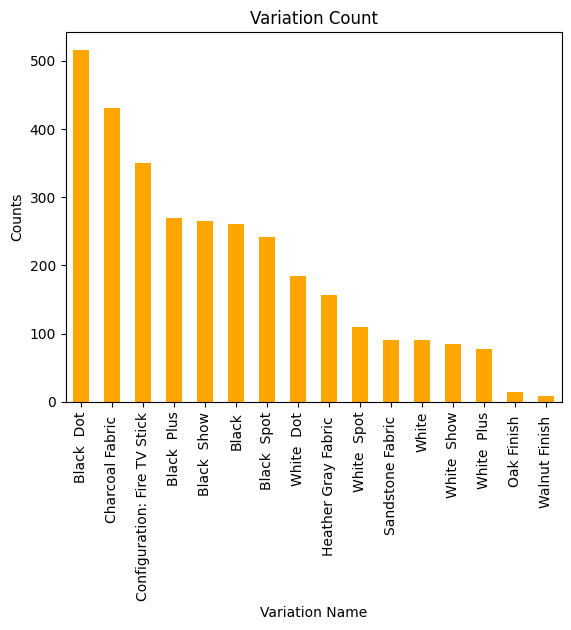

In [49]:
data['variation'].value_counts().plot.bar(color="orange")
plt.title("Variation Count")
plt.xlabel("Variation Name")
plt.ylabel("Counts")
plt.show()

In [50]:
data.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

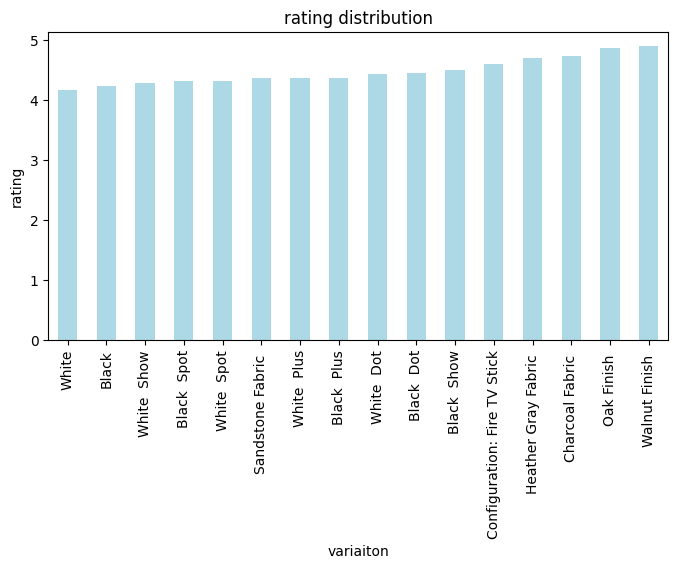

In [75]:
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color='lightblue', figsize=(8,4))
plt.title("rating distribution")
plt.xlabel("variaiton")
plt.ylabel("rating")
plt.show()

Analysis of Verified Review Coloumn

In [58]:
data['length'].describe()

count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

[Text(0.5, 1.0, 'Distribution of review length')]

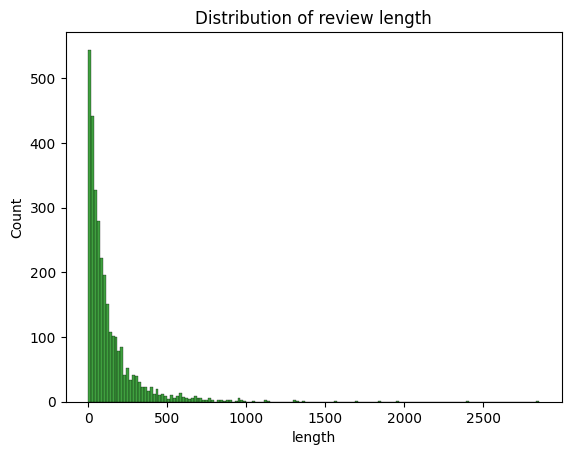

In [61]:
sns.histplot(data['length'], color='green').set(title= "Distribution of review length")

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

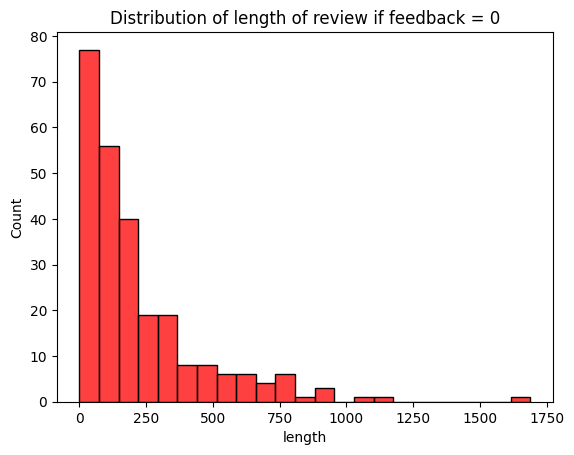

In [62]:
sns.histplot(data[data['feedback']==0]['length'],color='red').set(title='Distribution of length of review if feedback = 0')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 1')]

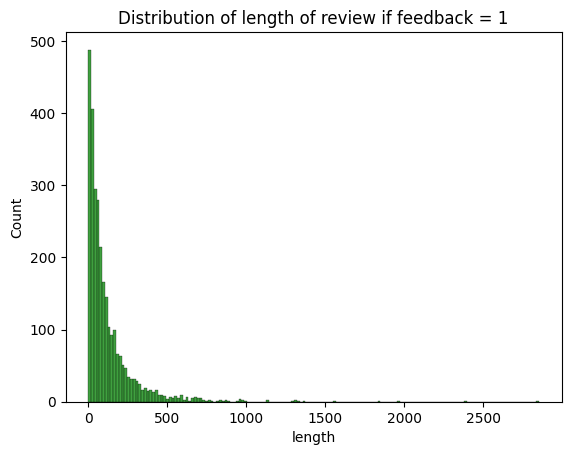

In [63]:
sns.histplot(data[data['feedback']==1]['length'],color='green').set(title='Distribution of length of review if feedback = 1')

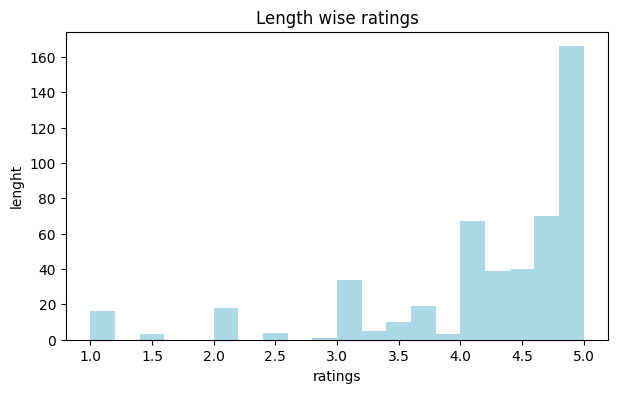

people who like product and write positve review tend to write longer reviews 
whereas vice versa can be said about the lower ratings


In [74]:
data.groupby('length')['rating'].mean().plot.hist(color='lightblue', figsize=(7,4), bins=20)
plt.title("Length wise ratings")
plt.xlabel("ratings")
plt.ylabel("lenght")
plt.show()
print("people who like product and write positve review tend to write longer reviews \nwhereas vice versa can be said about the lower ratings")

In [76]:
cv = CountVectorizer(stopwords='english')
words = cv.fit_transform(data.verified_reviews)

NameError: name 'CountVectorizer' is not defined